# Data Preprocessing

In [17]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
import numpy as np
import pandas as pd
import warnings
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.exceptions import ConvergenceWarning  # Importing ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [9]:
Career_Stats_PS4_df = pd.read_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/CSV_files/Player Stats/Cleaned Player Stats/Career Stats/Career_Stats_PS4.csv', delimiter=',')
Career_Stats_Xbox_df = pd.read_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/CSV_files/Player Stats/Cleaned Player Stats/Career Stats/Career_Stats_Xbox.csv', delimiter=',')

# Preprocessing

In [10]:
Career_Stats_Xbox_df.head()

,player_name,career_kills,career_wins,career_revives
0,xoKaiz,351847,12109,16901
1,Upthrow,287983,19846,61712
2,Tollis,269662,16175,0
3,Forget Dat,263062,0,0
4,iMarshTV,235493,16196,19687


In [11]:
Career_Stats_Xbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_name     939 non-null    object
 1   career_kills    939 non-null    object
 2   career_wins     939 non-null    object
 3   career_revives  939 non-null    object
dtypes: object(4)
memory usage: 29.5+ KB


# Converting Objects into Numerical Values

In [12]:
# Convert the relevant columns to numeric
Career_Stats_PS4_df['career_kills'] = pd.to_numeric(Career_Stats_PS4_df['career_kills'], errors='coerce')
Career_Stats_PS4_df['career_wins'] = pd.to_numeric(Career_Stats_PS4_df['career_wins'], errors='coerce')
Career_Stats_PS4_df['career_revives'] = pd.to_numeric(Career_Stats_PS4_df['career_revives'], errors='coerce')

# Randomize data
Career_Stats_PS4_df = Career_Stats_PS4_df.sample(frac=1).reset_index(drop=True)

# Print the data types to verify the changes
Career_Stats_PS4_df.info()

# Convert the relevant columns to numeric
Career_Stats_Xbox_df['career_kills'] = pd.to_numeric(Career_Stats_Xbox_df['career_kills'], errors='coerce')
Career_Stats_Xbox_df['career_wins'] = pd.to_numeric(Career_Stats_Xbox_df['career_wins'], errors='coerce')
Career_Stats_Xbox_df['career_revives'] = pd.to_numeric(Career_Stats_Xbox_df['career_revives'], errors='coerce')

# Randomize data
Career_Stats_Xbox_df = Career_Stats_Xbox_df.sample(frac=1).reset_index(drop=True)

# Print the data types to verify the changes
Career_Stats_Xbox_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_name     983 non-null    object
 1   career_kills    983 non-null    int64 
 2   career_wins     983 non-null    int64 
 3   career_revives  983 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     939 non-null    object 
 1   career_kills    938 non-null    float64
 2   career_wins     938 non-null    float64
 3   career_revives  938 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.5+ KB


In [37]:
# df_report = ProfileReport(Career_Stats_df, minimal=True)
# df_report.to_file(output_file='Career_Stats.html')

# Drop Unnecessary Columns

In [13]:
# Replace 0s with NaN to treat them as missing values
Career_Stats_PS4_df.replace(0, np.nan, inplace=True)

# Drop the player_name column and separate it for reference
player_names_PS4 = Career_Stats_PS4_df['player_name']
numeric_PS4_df = Career_Stats_PS4_df.drop(columns=['player_name'])

# Print the data types to verify the changes
numeric_PS4_df.info()

# Replace 0s with NaN to treat them as missing values
Career_Stats_Xbox_df.replace(0, np.nan, inplace=True)

# Drop the player_name column and separate it for reference
player_names_Xbox = Career_Stats_Xbox_df['player_name']
numeric_Xbox_df = Career_Stats_Xbox_df.drop(columns=['player_name'])

# Print the data types to verify the changes
numeric_Xbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   career_kills    983 non-null    int64  
 1   career_wins     521 non-null    float64
 2   career_revives  464 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 23.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   career_kills    938 non-null    float64
 1   career_wins     514 non-null    float64
 2   career_revives  477 non-null    float64
dtypes: float64(3)
memory usage: 22.1 KB


# Data Imputation(filling in missing values using different techniques)

In [14]:
# Suppress iteration warnings for logistic regression convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Function to perform imputation on a given dataset
def perform_imputation(dataset_name, numeric_df, player_names):
    print(f"Starting imputation processes for {dataset_name}...")

    # Mode Imputation
    print("Performing Mode Imputation...")
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mode_imputed.insert(0, 'player_name', player_names)
    print("Mode Imputation completed.")

    # Logistic Regression Imputation
    print("Performing Logistic Regression Imputation...")
    lr_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), random_state=42, max_iter=10, verbose=2)
    df_lr_imputed = pd.DataFrame(lr_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_lr_imputed.insert(0, 'player_name', player_names)
    print("Logistic Regression Imputation completed.")

    # Random Forest Imputation
    print("Performing Random Forest Imputation...")
    rf_imputer = IterativeImputer(estimator=RandomForestClassifier(n_estimators=10), random_state=42, max_iter=10, verbose=2)
    df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_rf_imputed.insert(0, 'player_name', player_names)
    print("Random Forest Imputation completed.")

    # KNN Imputation
    print("Performing KNN Imputation...")
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_knn_imputed.insert(0, 'player_name', player_names)
    print("KNN Imputation completed.")

    # Mean Imputation
    print("Performing Mean Imputation...")
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mean_imputed.insert(0, 'player_name', player_names)
    print("Mean Imputation completed.")

    # Median Imputation
    print("Performing Median Imputation...")
    median_imputer = SimpleImputer(strategy='median')
    df_median_imputed = pd.DataFrame(median_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_median_imputed.insert(0, 'player_name', player_names)
    print("Median Imputation completed.")

    # XGBoost Imputation
    print("Performing XGBoost Imputation...")
    xgb_imputer = IterativeImputer(estimator=XGBRegressor(), random_state=42, max_iter=10, verbose=2)
    df_xgb_imputed = pd.DataFrame(xgb_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_xgb_imputed.insert(0, 'player_name', player_names)
    print("XGBoost Imputation completed.")

    # MICE Imputation
    print("Performing MICE Imputation...")
    mice_imputer = IterativeImputer(max_iter=10, random_state=42)
    df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mice_imputed.insert(0, 'player_name', player_names)
    print("MICE Imputation completed.")

    # Dictionary of imputed dataframes
    imputed_dataframes = {
        "Mode Imputation": df_mode_imputed,
        "Logistic Regression Imputation": df_lr_imputed,
        "Random Forest Imputation": df_rf_imputed,
        "KNN Imputation": df_knn_imputed,
        "Mean Imputation": df_mean_imputed,
        "Median Imputation": df_median_imputed,
        "XGBoost Imputation": df_xgb_imputed,
        "MICE Imputation": df_mice_imputed
    }

    # Check that there are no missing values
    print("\nVerifying no missing values after imputation:")
    for name, df in imputed_dataframes.items():
        missing = df.isnull().sum().sum()
        print(f"{name}: {missing} missing values")

    print(f"\nOriginal dataframe missing values (should be unchanged) for {dataset_name}:")
    print(numeric_df.isnull().sum())
    
    return imputed_dataframes

# Applying imputation on PS4 dataset
print("\nProcessing PS4 dataset...")
ps4_numeric_df = Career_Stats_PS4_df.drop(columns=['player_name'])
ps4_player_names = Career_Stats_PS4_df['player_name']
ps4_imputed_dfs = perform_imputation("PS4", ps4_numeric_df, ps4_player_names)

# Applying imputation on Xbox dataset
print("\nProcessing Xbox dataset...")
xbox_numeric_df = Career_Stats_Xbox_df.drop(columns=['player_name'])
xbox_player_names = Career_Stats_Xbox_df['player_name']
xbox_imputed_dfs = perform_imputation("Xbox", xbox_numeric_df, xbox_player_names)


Processing PS4 dataset...
Starting imputation processes for PS4...
Performing Mode Imputation...
Mode Imputation completed.
Performing Logistic Regression Imputation...
[IterativeImputer] Completing matrix with shape (983, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.91
[IterativeImputer] Change: 43281.00319346085, scaled tolerance: 379.649 
[IterativeImputer] Ending imputation round 2/10, elapsed time 5.63
[IterativeImputer] Change: 48423.0, scaled tolerance: 379.649 
[IterativeImputer] Ending imputation round 3/10, elapsed time 8.75
[IterativeImputer] Change: 49490.0, scaled tolerance: 379.649 
[IterativeImputer] Ending imputation round 4/10, elapsed time 11.68
[IterativeImputer] Change: 49490.0, scaled tolerance: 379.649 
[IterativeImputer] Ending imputation round 5/10, elapsed time 14.44
[IterativeImputer] Change: 33644.0, scaled tolerance: 379.649 
[IterativeImputer] Ending imputation round 6/10, elapsed time 17.37
[IterativeImputer] Change: 39057.0, scaled 

# Training the model on each imputed dataset to see which dataset is the best and running for each stat as the target variable

In [15]:
# Define the regression models to be used
models = {
    "Random Forest": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "LightGBM Regressor": lgb.LGBMRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Function to run model prediction
def run_model_prediction(target_column, df):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
    return model_scores

# Target columns to predict
target_columns = ['career_kills', 'career_wins', 'career_revives']

# Dictionary to store results for each platform
platform_results = {}

# Processing PS4 dataset
print("\nProcessing PS4 dataset...")
ps4_all_results = {}
for imputation_method, imputed_df in ps4_imputed_dfs.items():
    print(f"\nRunning models on {imputation_method} data:")
    # Drop the player_name column
    imputed_df = imputed_df.drop(columns=['player_name'])
    
    imputation_results = {}
    for target_column in target_columns:
        print(f"  Predicting {target_column}...")
        model_scores = run_model_prediction(target_column, imputed_df)
        imputation_results[target_column] = model_scores
    ps4_all_results[imputation_method] = imputation_results

platform_results['PS4'] = ps4_all_results

# Processing Xbox dataset
print("\nProcessing Xbox dataset...")
xbox_all_results = {}
for imputation_method, imputed_df in xbox_imputed_dfs.items():
    print(f"\nRunning models on {imputation_method} data:")
    # Drop the player_name column
    imputed_df = imputed_df.drop(columns=['player_name'])
    
    imputation_results = {}
    for target_column in target_columns:
        print(f"  Predicting {target_column}...")
        model_scores = run_model_prediction(target_column, imputed_df)
        imputation_results[target_column] = model_scores
    xbox_all_results[imputation_method] = imputation_results

platform_results['Xbox'] = xbox_all_results

# Results for each platform
for platform, all_results in platform_results.items():
    print(f"\nResults for {platform} dataset:")
    for imputation_method, imputation_results in all_results.items():
        print(f"\nResults for {imputation_method}:")
        for target_column, model_scores in imputation_results.items():
            print(f"  Target: {target_column}")
            for model_name, score in model_scores.items():
                print(f"    {model_name}: {score:.4f}")

# Find the best model and imputation method for each target on each platform
best_combinations = {}
for platform, all_results in platform_results.items():
    best_combinations[platform] = {}
    for target_column in target_columns:
        best_score = float('-inf')  # Initialize to the lowest possible score
        best_model = ""
        best_imputation = ""
        for imputation_method, imputation_results in all_results.items():
            for model_name, score in imputation_results[target_column].items():
                if score > best_score:
                    best_score = score
                    best_model = model_name
                    best_imputation = imputation_method
        best_combinations[platform][target_column] = (best_imputation, best_model, best_score)

print("\nBest Combinations for each platform:")
for platform, target_results in best_combinations.items():
    print(f"\n{platform} dataset:")
    for target, (imputation, model, score) in target_results.items():
        print(f"{target}: {imputation} with {model} (Score: {score:.4f})")


Processing PS4 dataset...

Running models on Mode Imputation data:
  Predicting career_kills...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 786, number of used features: 2
[LightGBM] [Info] Start training from score 109005.730280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [41]:
print("Career Kills Distribution:")
print(Career_Stats_df['career_kills'].describe())
print("\nCareer Wins Distribution:")
print(Career_Stats_df['career_wins'].describe())
print("\nCareer Revives Distribution:")
print(Career_Stats_df['career_revives'].describe())


Career Kills Distribution:
count      1904.000000
mean      96842.709559
std       29643.591753
min        5374.000000
25%       78829.000000
50%       89994.000000
75%      107428.000000
max      371099.000000
Name: career_kills, dtype: float64

Career Wins Distribution:
count      973.00000
mean      6507.21480
std       2563.48393
min         52.00000
25%       4721.00000
50%       6099.00000
75%       7716.00000
max      21010.00000
Name: career_wins, dtype: float64

Career Revives Distribution:
count      896.000000
mean     13735.802455
std       5901.073875
min       3288.000000
25%      10250.000000
50%      12159.500000
75%      15508.250000
max      67615.000000
Name: career_revives, dtype: float64


## Cross-Validation and Additional Metrics

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split

# Define the target variable and features
target_variable = 'career_kills'
features = [col for col in df_mode_imputed.columns if col != 'player_name' and col != target_variable]

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate each imputed dataset
for name, df in imputed_dataframes.items():
    X = df[features]
    y = df[target_variable]
    
    # Use a simple model like RandomForest for evaluation
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Cross-validation
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    
    # Store evaluation metrics
    evaluation_results[name] = {
        'Mean MSE': -np.mean(mse_scores),
        'Mean R2': np.mean(r2_scores),
        'Mean MAE': -np.mean(mae_scores)
    }

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print("Evaluation Results for Different Imputation Methods:")
print(evaluation_df)

Evaluation Results for Different Imputation Methods:
                                    Mean MSE   Mean R2      Mean MAE
Mode Imputation                 6.402047e+08  0.275792  17711.413825
Logistic Regression Imputation  2.960273e+08  0.679303   8779.039746
Random Forest Imputation        1.864240e+08  0.784548   6660.200888
KNN Imputation                  3.372765e+08  0.613201  10925.038853
Mean Imputation                 6.116154e+08  0.288501  17019.837561
Median Imputation               6.191490e+08  0.280328  17273.936979
XGBoost Imputation              2.764998e+08  0.678327   9806.175615
MICE Imputation                 2.788593e+08  0.676306   8833.987012


## Data Distribution and Consistency Checks

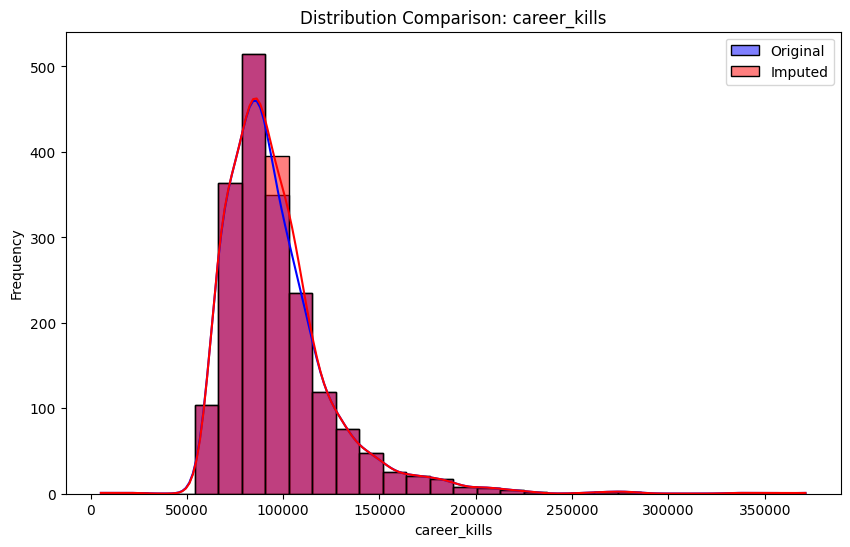

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of original vs. imputed data
def plot_distribution_comparison(original_data, imputed_data, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[feature].dropna(), color='blue', kde=True, label='Original', bins=30)
    sns.histplot(imputed_data[feature], color='red', kde=True, label='Imputed', bins=30)
    plt.title(f"Distribution Comparison: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Assuming `Career_Stats_df` contains the original dataset with missing values
original_data = Career_Stats_df

# Compare distributions for a sample feature
feature_to_compare = 'career_kills'
plot_distribution_comparison(original_data, df_rf_imputed, feature_to_compare)


## Ensemble of Imputation Methods

In [44]:
from sklearn.ensemble import VotingRegressor

# Prepare datasets for ensemble
datasets_for_ensemble = [df_lr_imputed, df_rf_imputed, df_knn_imputed]

# Training data for ensemble model
X_ensemble = pd.concat([df[features] for df in datasets_for_ensemble])
y_ensemble = pd.concat([df[target_variable] for df in datasets_for_ensemble])

# Create a voting regressor ensemble model
ensemble_model = VotingRegressor([
    ('lr', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('knn', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Cross-validation for ensemble model
mse_scores_ensemble = cross_val_score(ensemble_model, X_ensemble, y_ensemble, cv=5, scoring='neg_mean_squared_error')
r2_scores_ensemble = cross_val_score(ensemble_model, X_ensemble, y_ensemble, cv=5, scoring='r2')

print("Ensemble Model Evaluation:")
print(f"Mean MSE: {-np.mean(mse_scores_ensemble)}")
print(f"Mean R2: {np.mean(r2_scores_ensemble)}")


Ensemble Model Evaluation:
Mean MSE: 109813018.42924896
Mean R2: 0.874648550362993


In [45]:
ensemble_df = pd.concat(datasets_for_ensemble)
# Assuming 'player_name' is a unique identifier, remove duplicates by averaging or taking the first occurrence
ensemble_df = ensemble_df.groupby('player_name', as_index=False).mean()

# Define the output file path
output_csv = 'C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PS and Xbox/Career_Stats_ensemble_imputed_Console.csv'

# Write the ensemble-imputed dataset to a CSV file
ensemble_df.to_csv(output_csv, index=False)

print(f"Ensemble imputed dataset saved to {output_csv}")

Ensemble imputed dataset saved to C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PS and Xbox/Career_Stats_ensemble_imputed_Console.csv


## Check for Missing Values:

In [46]:
# Check for missing values in the ensemble dataset
missing_values_console = ensemble_df.isnull().sum().sum()

print(f"Total missing values in Console ensemble dataset: {missing_values_console}")

Total missing values in Console ensemble dataset: 0


## Distribution Comparison:

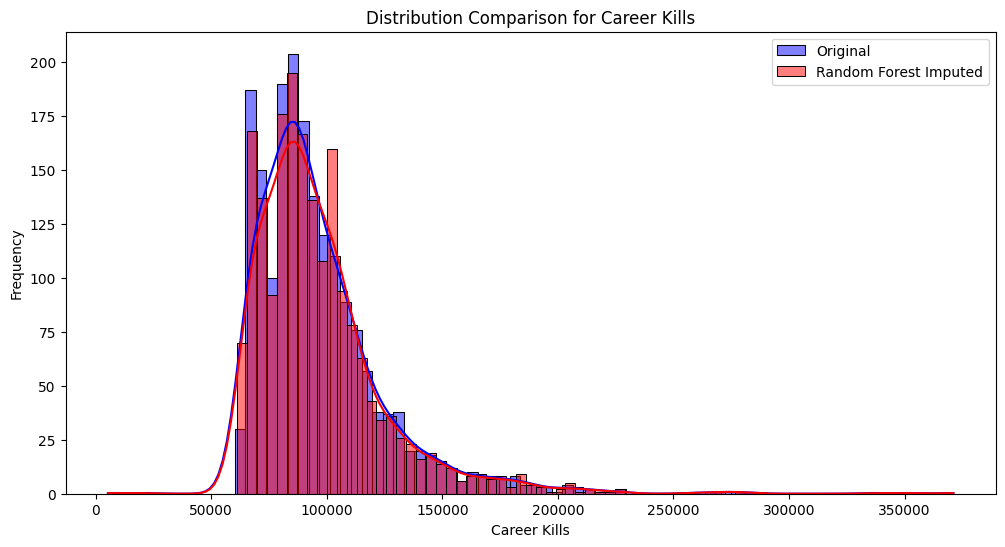

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare distributions for a feature (e.g., career_kills)
plt.figure(figsize=(12, 6))
sns.histplot(Career_Stats_df['career_kills'].dropna(), color='blue', label='Original', kde=True)
sns.histplot(df_rf_imputed['career_kills'], color='red', label='Random Forest Imputed', kde=True)
plt.title('Distribution Comparison for Career Kills')
plt.xlabel('Career Kills')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Statistical Tests:

In [48]:
from scipy.stats import ttest_ind

# T-test for equality of means between original and imputed data
t_stat, p_value = ttest_ind(Career_Stats_df['career_kills'].dropna(), ensemble_df['career_kills'], equal_var=False)
print(f"T-test statistic: {t_stat}, p-value: {p_value}")


T-test statistic: -0.18248183630788295, p-value: 0.855214285655971


## Correlation Analysis

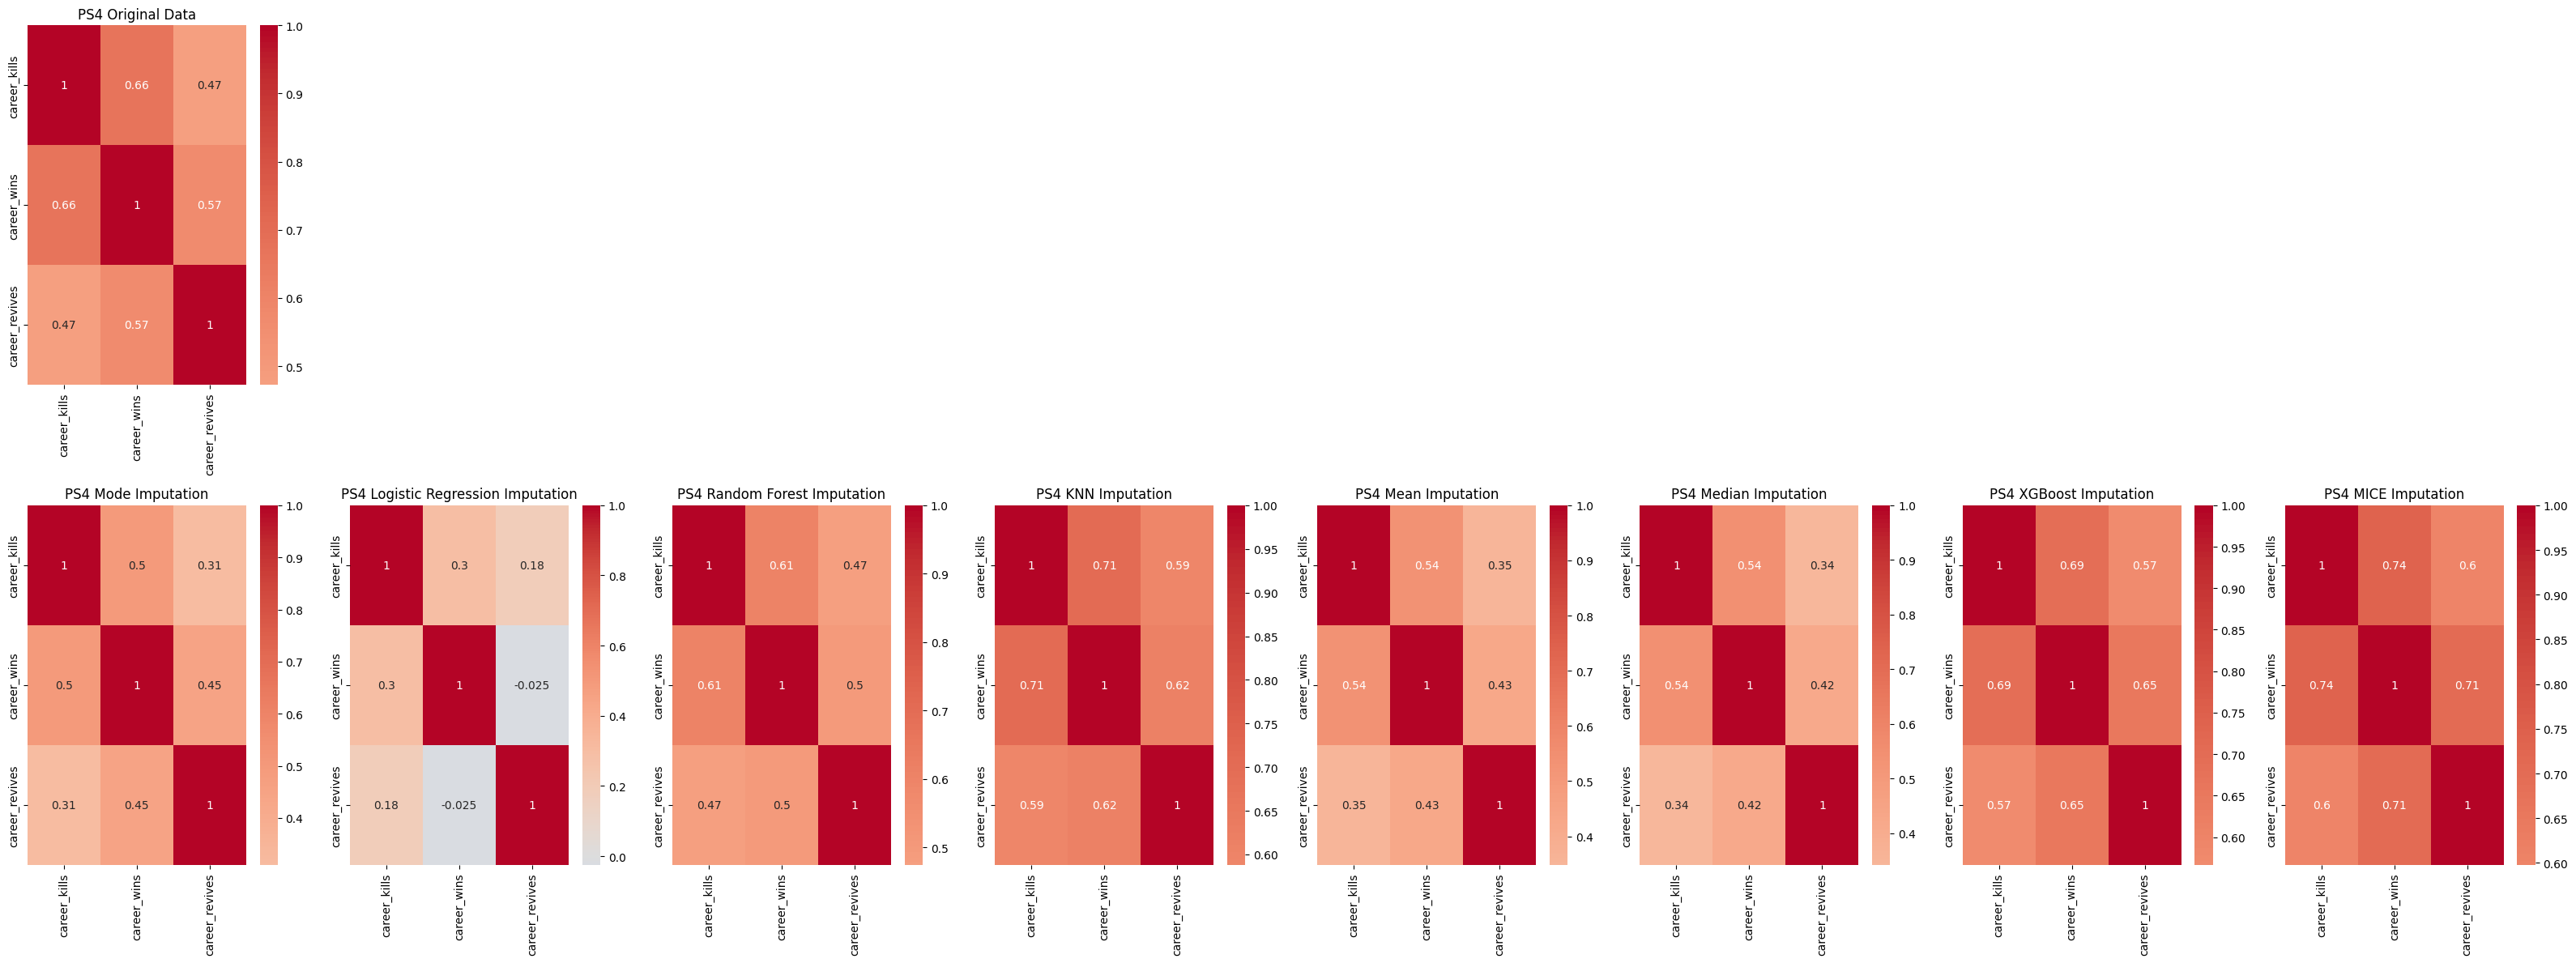

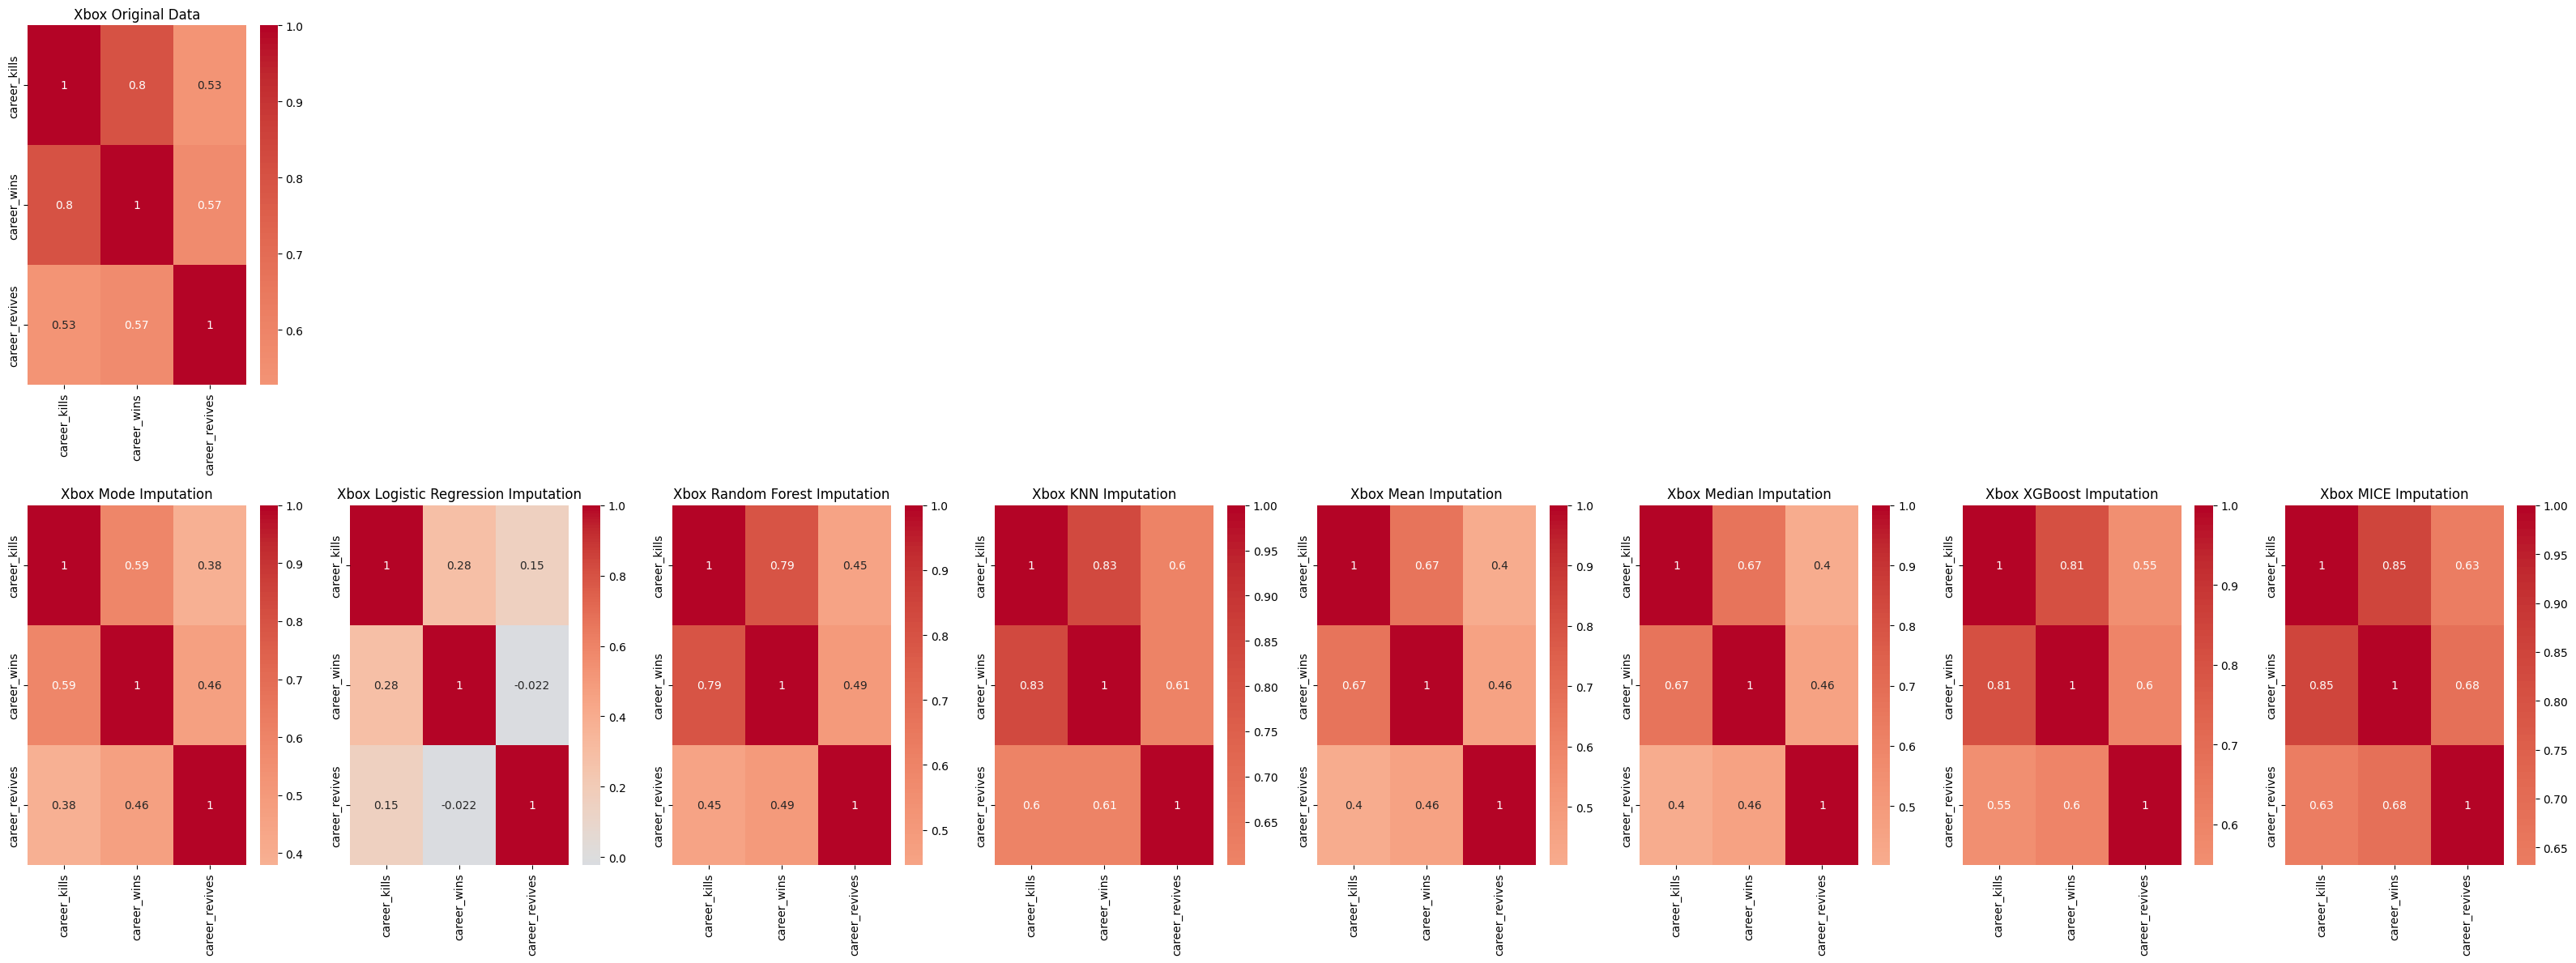

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to round numeric columns
def round_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].round(0).astype(int)
    return df

# Function to plot correlation matrices for each imputation method
def plot_correlation_matrices(imputed_dfs, title_prefix, original_corr):
    methods = list(imputed_dfs.keys())
    num_methods = len(methods)

    # Create a subplot grid with one row for original data and one for each imputation method
    fig, axes = plt.subplots(nrows=2, ncols=num_methods, figsize=(4 * num_methods, 12))
    
    # Plot the original correlation matrix first
    sns.heatmap(original_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
    axes[0, 0].set_title(f'{title_prefix} Original Data')
    
    # Hide empty subplots in the first row
    for i in range(1, num_methods):
        axes[0, i].axis('off')
    
    # Plot the correlation matrices for each imputation method
    for i, method in enumerate(methods):
        # Round numeric columns before calculating correlation
        imputed_df_rounded = round_numeric_columns(imputed_dfs[method])
        imputed_corr = imputed_df_rounded.drop(columns=['player_name']).select_dtypes(include=['number']).corr()
        sns.heatmap(imputed_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1, i])
        axes[1, i].set_title(f'{title_prefix} {method}')

    plt.tight_layout()
    plt.show()

# Assuming you have already run the imputation processes and have the following dictionaries:
# - ps4_imputed_dfs (containing imputed datasets for PS4)
# - xbox_imputed_dfs (containing imputed datasets for Xbox)

# Original numeric datasets
ps4_numeric_original = Career_Stats_PS4_df.drop(columns=['player_name']).select_dtypes(include=['number'])
xbox_numeric_original = Career_Stats_Xbox_df.drop(columns=['player_name']).select_dtypes(include=['number'])

# Calculate original correlation matrices
ps4_original_corr = ps4_numeric_original.corr()
xbox_original_corr = xbox_numeric_original.corr()

# Plot correlation matrices for PS4
plot_correlation_matrices(ps4_imputed_dfs, 'PS4', ps4_original_corr)

# Plot correlation matrices for Xbox
plot_correlation_matrices(xbox_imputed_dfs, 'Xbox', xbox_original_corr)


## Model Performance Comparison:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Drop player_name column and prepare data
X_original = Career_Stats_df.drop(columns=['player_name', 'career_kills'])
y_original = Career_Stats_df['career_kills']
X_imputed = df_rf_imputed.drop(columns=['player_name', 'career_kills'])
y_imputed = df_rf_imputed['career_kills']

# Split data into train and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Train a model on original and imputed data
model_orig = RandomForestRegressor(n_estimators=100, random_state=42)
model_imp = RandomForestRegressor(n_estimators=100, random_state=42)

model_orig.fit(X_train_orig.fillna(0), y_train_orig.fillna(0))  # Handling missing values for the test
model_imp.fit(X_train_imp, y_train_imp)

# Evaluate performance
y_pred_orig = model_orig.predict(X_test_orig.fillna(0))
y_pred_imp = model_imp.predict(X_test_imp)

mse_orig = mean_squared_error(y_test_orig.fillna(0), y_pred_orig)
mse_imp = mean_squared_error(y_test_imp, y_pred_imp)

print(f"Mean Squared Error (Original): {mse_orig}")
print(f"Mean Squared Error (Imputed): {mse_imp}")


Mean Squared Error (Original): 937529307.6895167
Mean Squared Error (Imputed): 187501681.4422582


In [24]:
import os

# Directories to save the files
ps4_save_dir = "C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation FIles PS and Xbox/PS"
xbox_save_dir = "C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation FIles PS and Xbox/Xbox"

# Create directories if they do not exist
os.makedirs(ps4_save_dir, exist_ok=True)
os.makedirs(xbox_save_dir, exist_ok=True)

# Rounding function to convert to whole numbers
def round_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].round(0).astype(int)
    return df

# Round and save the PS4 MICE imputed dataset
df_ps4_mice_imputed_rounded = round_numeric_columns(ps4_imputed_dfs["MICE Imputation"])
ps4_mice_imputed_path = os.path.join(ps4_save_dir, "Career_Stats_mice_imputed_PS.csv")
df_ps4_mice_imputed_rounded.to_csv(ps4_mice_imputed_path, index=False)
print(f"PS4 MICE imputed dataset saved to {ps4_mice_imputed_path}")

# Round and save the Xbox MICE imputed dataset
df_xbox_mice_imputed_rounded = round_numeric_columns(xbox_imputed_dfs["MICE Imputation"])
xbox_mice_imputed_path = os.path.join(xbox_save_dir, "Career_Stats_mice_imputed_Xbox.csv")
df_xbox_mice_imputed_rounded.to_csv(xbox_mice_imputed_path, index=False)
print(f"Xbox MICE imputed dataset saved to {xbox_mice_imputed_path}")


PS4 MICE imputed dataset saved to C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation FIles PS and Xbox/PS\Career_Stats_mice_imputed_PS.csv
Xbox MICE imputed dataset saved to C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation FIles PS and Xbox/Xbox\Career_Stats_mice_imputed_Xbox.csv
